In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Data

In [4]:
data = pd.read_csv('data\\Iris.csv')
data.set_index('Id', inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
data.Species = data.Species.apply(lambda s: s[5:])
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [9]:
features = data[['PetalLengthCm', 'PetalWidthCm']]
target = data[['Species']]

In [15]:
import warnings
warnings.filterwarnings(action='ignore')

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
scaled = scaler.fit_transform(features)
features.iloc[:, 0] = scaled[:,0]
features.iloc[:, 1] = scaled[:,1]
features.head()

,PetalLengthCm,PetalWidthCm
Id,,
1,-0.864407,-0.916667
2,-0.864407,-0.916667
3,-0.898305,-0.916667
4,-0.830508,-0.916667
5,-0.864407,-0.916667


In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
target.iloc[:,0] = encoder.fit_transform(target)
target

,Species
Id,
1,0
2,0
3,0
4,0
5,0
...,...
146,2
147,2
148,2


In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.3, random_state=42
)

# SVM Modeling

In [25]:
from sklearn.svm import SVC
model = SVC(probability=True)
model.fit(xtrain, ytrain)

SVC(probability=True)

In [29]:
model.predict_proba(xtest)

array([0.01353151, 0.94637907, 0.04008942])

In [30]:
ytest.iloc[0]

Species    1
Name: 74, dtype: int64

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
ypred = model.predict(xtest)
accuracy_score(ytest, ypred)

1.0

In [34]:
confusion_matrix(ytest, ypred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [35]:
precision_score(ytest, ypred, average='weighted')

1.0

In [36]:
recall_score(ytest, ypred, average='weighted')

1.0

# Hyperparameter Tuning

In [43]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [50]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
    model,
    param_grid={
        'C': [5,7,10,13,15],
        'kernel': ['rbf', 'linear', 'poly'],
        'degree': [3,5,7],
        'gamma': ['scale', 'auto'],
    }, scoring='accuracy', cv=10, verbose=2
)
grid.fit(features, target)

Fitting 10 folds for each of 90 candidates, totalling 900 fits
[CV] END .............C=5, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .............C=5, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .............C=5, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .............C=5, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .............C=5, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .............C=5, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .............C=5, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .............C=5, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .............C=5, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .............C=5, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..........C=5, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..........C=5, degree=3, gamma=scale,

GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid={'C': [5, 7, 10, 13, 15], 'degree': [3, 5, 7],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy', verbose=2)

In [51]:
grid.best_params_

{'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}

# Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(model, features, target, cv=10)
cv

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.86666667, 1.        , 1.        , 1.        ])

In [42]:
cv.mean()

0.96

# Visualization

In [54]:
best_model = grid.best_estimator_

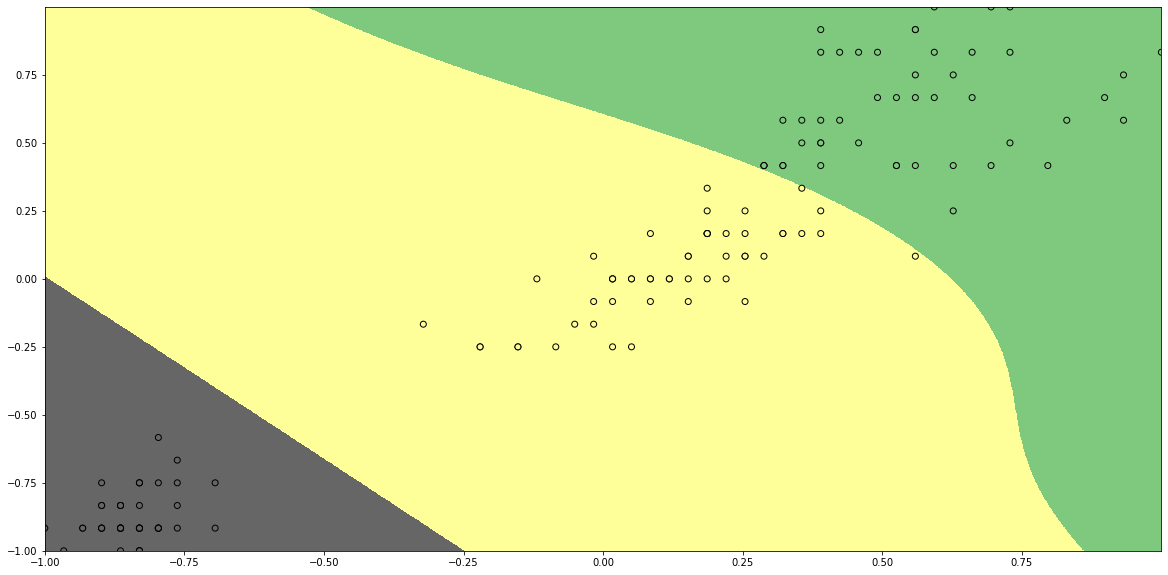

In [56]:
xmin, xmax = features.PetalLengthCm.values.min(), features.PetalLengthCm.values.max()
ymin, ymax = features.PetalWidthCm.values.min(), features.PetalWidthCm.values.max()

xx, yy = np.meshgrid(
    np.arange(xmin, xmax, 0.001), np.arange(ymin, ymax, 0.001)
)

grid = np.c_[xx.ravel(), yy.ravel()]
y_pred = best_model.predict(grid)
y_pred = y_pred.reshape(yy.shape)

predictions = best_model.predict(features)

plt.figure(1, figsize=(20, 10))
plt.set_cmap(plt.cm.Accent_r)
plt.pcolormesh(xx, yy, y_pred)
plt.scatter(features.PetalLengthCm, features.PetalWidthCm, c=predictions, edgecolors='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()